# Bike Sharing Program Demand Prediction Analysis

Narrative and Project Objective
- Capital Bikeshare is a bike rental company in Washington, D.C., with several thousand daily users. The number of users changes from day to day based on meteorological factors, and they wanted a model that could predict the number of users based on these factors.

### Part 1: Data Inspection and Wrangling

In [1]:
# Importing pandas, numpy, the encoder, and the dataset

import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
oribikedf = pd.read_csv(r"C:\Users\nosra\OneDrive\Documents\College 2020-2024\Classes\Semester 7\Python for Business Analytics\Python Project\Project Docs\day.csv")

In [2]:
# First view of the data
oribikedf

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [3]:
# Shows #rows and #columns
oribikedf.shape

(731, 16)

In [4]:
# Renaming the columns
oribikedf = oribikedf.rename(columns={'dteday': 'Date', 'season': 'Season', 'yr': 'Year', 'mnth': 'Month', 'registered':'Reg_Users','cnt':'TotalUses', 'holiday': 'Holiday', 'weekday': 'Weekday', 'workingday':'Workday', 'weathersit': 'WtrStatus', 'temp':'Temp', 'atemp':'FeltTemp', 'hum': 'Humidity', 'windspeed': 'WindSpd', 'casual':'Cas_Users'})

# Dropping the uncessesary "instant" column
oribikedf = oribikedf.drop("instant", axis=1)
oribikedf

,Date,Season,Year,Month,Holiday,Weekday,Workday,WtrStatus,Temp,FeltTemp,Humidity,WindSpd,Cas_Users,Reg_Users,TotalUses
0,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,12/27/2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,12/28/2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,12/29/2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,12/30/2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [5]:
# Changing Temp and FeltTemp columns from C to F, and denormalizing them. 
# All Temp and FeltTemp data were originally divided by 41 and 50, respectively
oribikedf["Temp"] = (((oribikedf["Temp"]*41)*(9/5)) + 32)
oribikedf["FeltTemp"] = (((oribikedf["FeltTemp"]*50)*(9/5)) + 32)

# Changing Windspeed back Mph, and denormalzing it. It was orginally divided by 67
oribikedf["WindSpd"] = (oribikedf["WindSpd"]*67)

# Denormalzing Humidity. It was orginally divided by 100
oribikedf["Humidity"] = (oribikedf["Humidity"]*100)
oribikedf


,Date,Season,Year,Month,Holiday,Weekday,Workday,WtrStatus,Temp,FeltTemp,Humidity,WindSpd,Cas_Users,Reg_Users,TotalUses
0,1/1/2011,1,0,1,0,6,0,2,57.399525,64.72625,80.5833,10.749882,331,654,985
1,1/2/2011,1,0,1,0,0,0,2,58.824676,63.83651,69.6087,16.652113,131,670,801
2,1/3/2011,1,0,1,0,1,1,1,46.491663,49.04645,43.7273,16.636703,120,1229,1349
3,1/4/2011,1,0,1,0,2,1,1,46.760000,51.09098,59.0435,10.739832,108,1454,1562
4,1/5/2011,1,0,1,0,3,1,1,48.749427,52.63430,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,12/27/2012,1,1,12,0,4,1,2,50.757525,52.39778,65.2917,23.458911,247,1867,2114
727,12/28/2012,1,1,12,0,5,1,2,50.695975,54.95414,59.0000,10.416557,644,2451,3095
728,12/29/2012,1,1,12,0,6,0,2,50.695975,53.81600,75.2917,8.333661,159,1182,1341
729,12/30/2012,1,1,12,0,0,0,1,50.880475,52.85300,48.3333,23.500518,364,1432,1796


In [6]:
# Shows a list of columns, hnon-null values, and data types. There are no null/missing values
oribikedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       731 non-null    object 
 1   Season     731 non-null    int64  
 2   Year       731 non-null    int64  
 3   Month      731 non-null    int64  
 4   Holiday    731 non-null    int64  
 5   Weekday    731 non-null    int64  
 6   Workday    731 non-null    int64  
 7   WtrStatus  731 non-null    int64  
 8   Temp       731 non-null    float64
 9   FeltTemp   731 non-null    float64
 10  Humidity   731 non-null    float64
 11  WindSpd    731 non-null    float64
 12  Cas_Users  731 non-null    int64  
 13  Reg_Users  731 non-null    int64  
 14  TotalUses  731 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.8+ KB


### Part 2: Key Summary Statistics

In [7]:
# Key Observations:

# There is a far higher number of registered users than casual users
# The mean Temp is 68.55F on a given day
# The mean FeltTemp is 74.69F on a given day
# The mean Humidity is 62.78 on a given day
# The mean WindSpd is 12MPH on a given day 
# The mean # of Casual Users is 848 on a given day 
# The mean # of Registered Users is 3656 on a given day
# The mean # of Total Uses is 4504 on a given day

pd.options.display.float_format = '{:.4f}'.format
oribikedf.describe()

,Season,Year,Month,Holiday,Weekday,Workday,WtrStatus,Temp,FeltTemp,Humidity,WindSpd,Cas_Users,Reg_Users,TotalUses
count,731.0000,731.0000,731.0000,731.0000,731.0000,731.0000,731.0000,731.0000,731.0000,731.0000,731.0000,731.0000,731.0000,731.0000
mean,2.4966,0.5007,6.5198,0.0287,2.9973,0.6840,1.3953,68.5594,74.6919,62.7894,12.7626,848.1765,3656.1724,4504.3488
std,1.1108,0.5003,3.4519,0.1672,2.0048,0.4652,0.5449,13.5092,14.6665,14.2429,5.1924,686.6225,1560.2564,1937.2115
min,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,36.3638,39.1163,0.0000,1.5002,2.0000,20.0000,22.0000
25%,2.0000,0.0000,4.0000,0.0000,1.0000,0.0000,1.0000,56.8768,62.4058,52.0000,9.0416,315.5000,2497.0000,3152.0000
50%,3.0000,1.0000,7.0000,0.0000,3.0000,1.0000,1.0000,68.7770,75.8060,62.6667,12.1253,713.0000,3662.0000,4548.0000
75%,3.0000,1.0000,10.0000,0.0000,5.0000,1.0000,2.0000,80.3697,86.7742,73.0208,15.6254,1096.0000,4776.5000,5956.0000
max,4.0000,1.0000,12.0000,1.0000,6.0000,1.0000,3.0000,95.5910,107.6806,97.2500,34.0000,3410.0000,6946.0000,8714.0000


In [8]:
numericalbikedf = oribikedf.drop(['Season','Year','Month', 'Holiday', 'Weekday', 'Workday', 'WtrStatus' ],axis=1)
numericalbikedf.describe()

,Temp,FeltTemp,Humidity,WindSpd,Cas_Users,Reg_Users,TotalUses
count,731.0000,731.0000,731.0000,731.0000,731.0000,731.0000,731.0000
mean,68.5594,74.6919,62.7894,12.7626,848.1765,3656.1724,4504.3488
std,13.5092,14.6665,14.2429,5.1924,686.6225,1560.2564,1937.2115
min,36.3638,39.1163,0.0000,1.5002,2.0000,20.0000,22.0000
25%,56.8768,62.4058,52.0000,9.0416,315.5000,2497.0000,3152.0000
50%,68.7770,75.8060,62.6667,12.1253,713.0000,3662.0000,4548.0000
75%,80.3697,86.7742,73.0208,15.6254,1096.0000,4776.5000,5956.0000
max,95.5910,107.6806,97.2500,34.0000,3410.0000,6946.0000,8714.0000


### Part 3: Correlations

In [9]:
#Creation of a Correlation Matrix
# Notice that the variables most highly correlated with TotalUses are temperature and the number of Registered Users
numericalbikedf_matrix = numericalbikedf.corr(numeric_only=True)
numericalbikedf_matrix

,Temp,FeltTemp,Humidity,WindSpd,Cas_Users,Reg_Users,TotalUses
Temp,1.0000,0.9917,0.1270,-0.1579,0.5433,0.5400,0.6275
FeltTemp,0.9917,1.0000,0.1400,-0.1836,0.5439,0.5442,0.6311
Humidity,0.1270,0.1400,1.0000,-0.2485,-0.0770,-0.0911,-0.1007
WindSpd,-0.1579,-0.1836,-0.2485,1.0000,-0.1676,-0.2174,-0.2345
Cas_Users,0.5433,0.5439,-0.0770,-0.1676,1.0000,0.3953,0.6728
Reg_Users,0.5400,0.5442,-0.0911,-0.2174,0.3953,1.0000,0.9455
TotalUses,0.6275,0.6311,-0.1007,-0.2345,0.6728,0.9455,1.0000


### Part 4: Histogram, Bar Chart, and Scatter Plot Visualizations

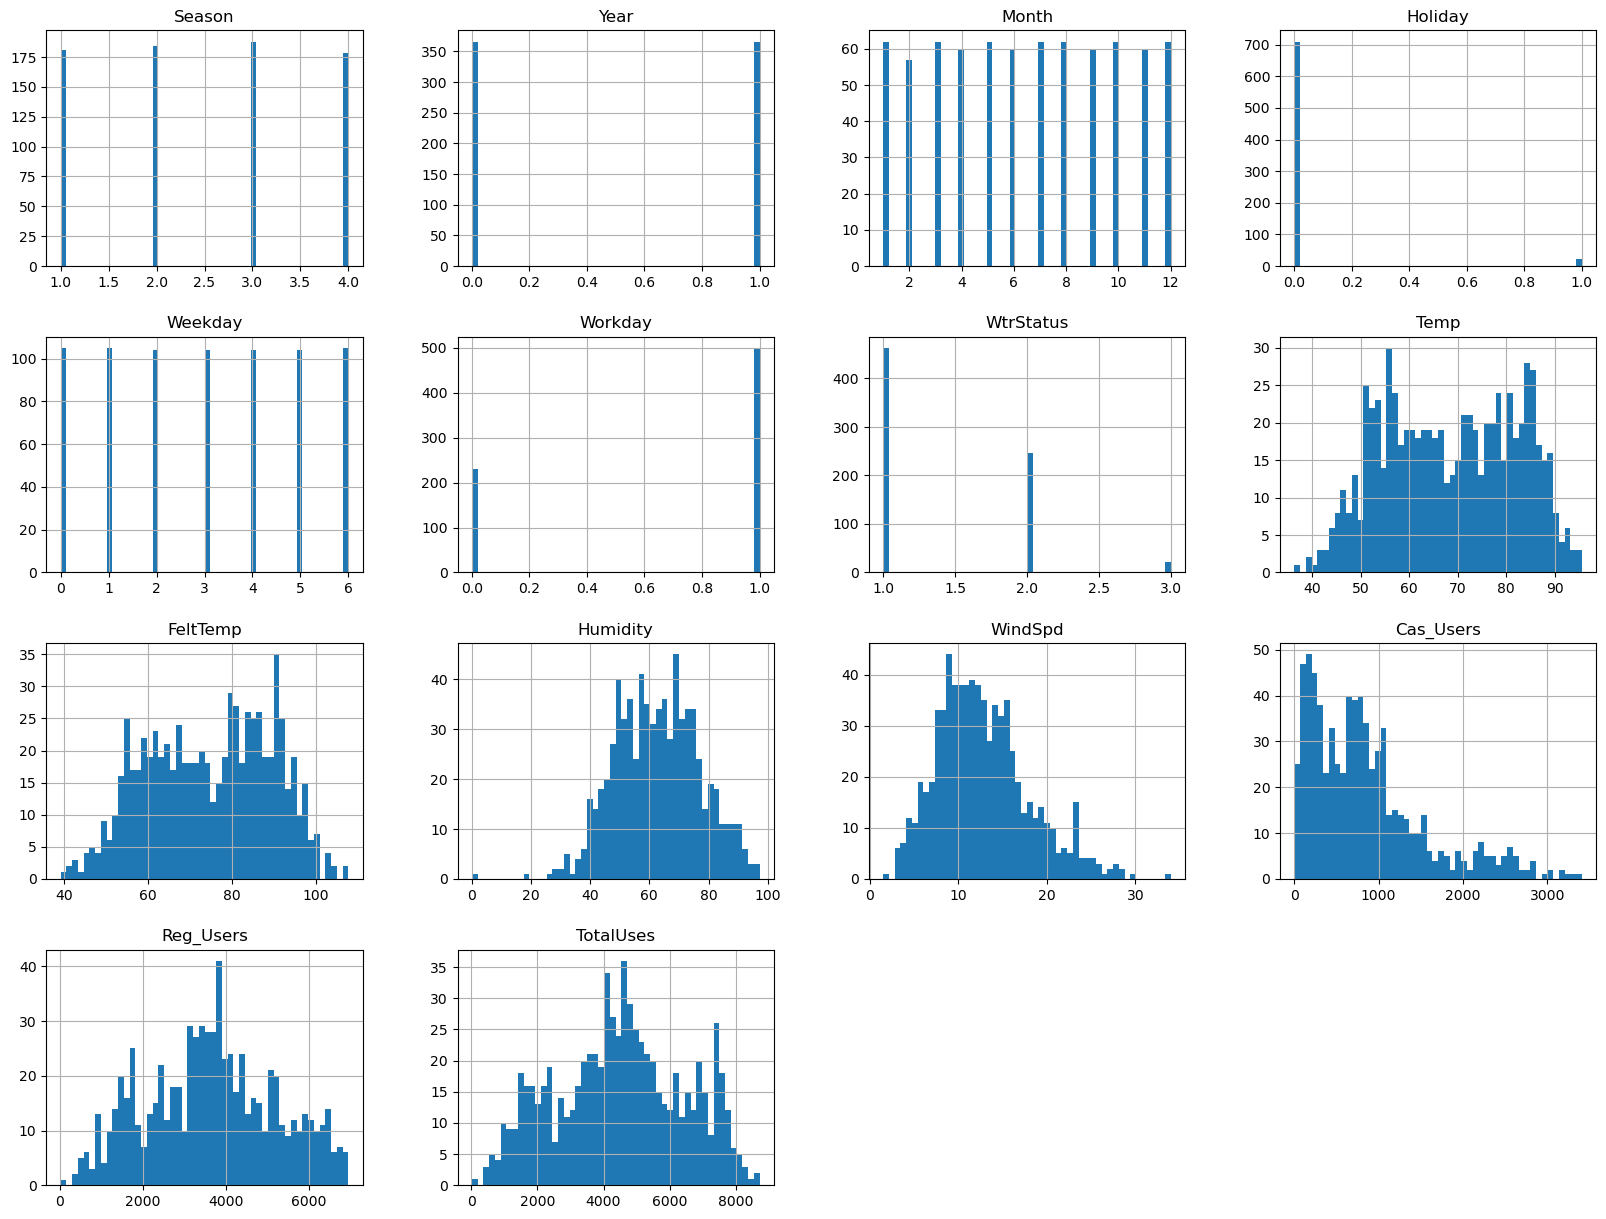

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

oribikedf.hist(bins=50, figsize=(20,15))
plt.show()
               
# Key Histograms include:
# Temp
# FeltTemp
# Humidity - Normal Distribution
# WindSpd - Right Skewed
# Cas_Users - Right Skewed
# Reg_Users - Normal Distribution
# TotalUses - Normal Distribution

(array([ 1.,  0.,  2.,  5.,  6.,  3., 13.,  4., 10., 14., 20., 16., 25.,
        11.,  7., 13., 15., 22., 12., 18., 18., 10., 29., 27., 29., 28.,
        28., 41., 23., 24., 17., 24., 13., 16., 15., 10., 21., 20., 11.,
         9., 12., 10., 13., 12., 10., 11., 14.,  6.,  7.,  6.]),
 array([  20.  ,  158.52,  297.04,  435.56,  574.08,  712.6 ,  851.12,
         989.64, 1128.16, 1266.68, 1405.2 , 1543.72, 1682.24, 1820.76,
        1959.28, 2097.8 , 2236.32, 2374.84, 2513.36, 2651.88, 2790.4 ,
        2928.92, 3067.44, 3205.96, 3344.48, 3483.  , 3621.52, 3760.04,
        3898.56, 4037.08, 4175.6 , 4314.12, 4452.64, 4591.16, 4729.68,
        4868.2 , 5006.72, 5145.24, 5283.76, 5422.28, 5560.8 , 5699.32,
        5837.84, 5976.36, 6114.88, 6253.4 , 6391.92, 6530.44, 6668.96,
        6807.48, 6946.  ]),
 <BarContainer object of 50 artists>)

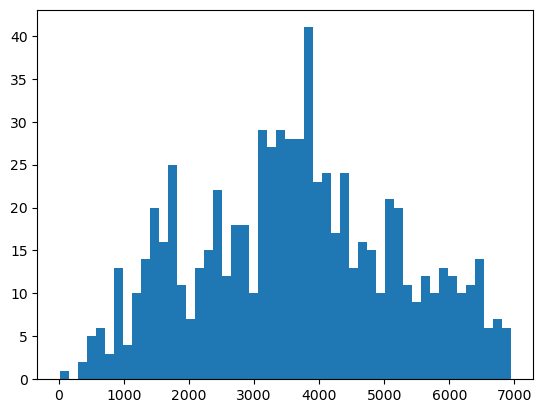

In [11]:
plt.hist(oribikedf['Reg_Users'],bins=50)

In [12]:
# Creating dataframe for data specifically in 2011 and 2012
bikedf2011 = oribikedf[oribikedf["Year"]==0]
bikedf2012 = oribikedf[oribikedf["Year"]==1]

Text(0.5, 1.0, '2011 Bicycle Use By Months')

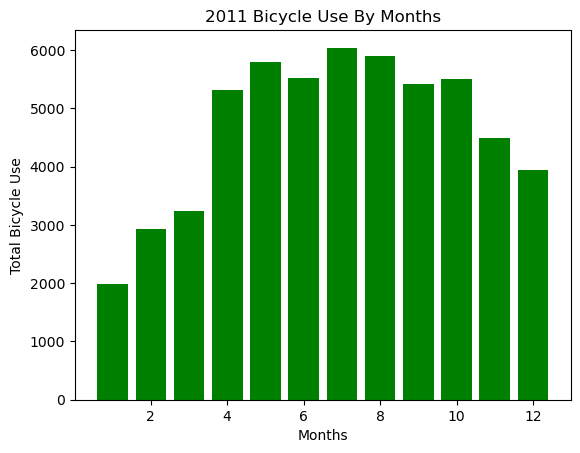

In [13]:
plt.bar(bikedf2011['Month'], bikedf2011['TotalUses'], color = 'green')
plt.xlabel("Months")
plt.ylabel('Total Bicycle Use')
plt.title('2011 Bicycle Use By Months')

Text(0.5, 1.0, '2012 Bicycle Use By Months')

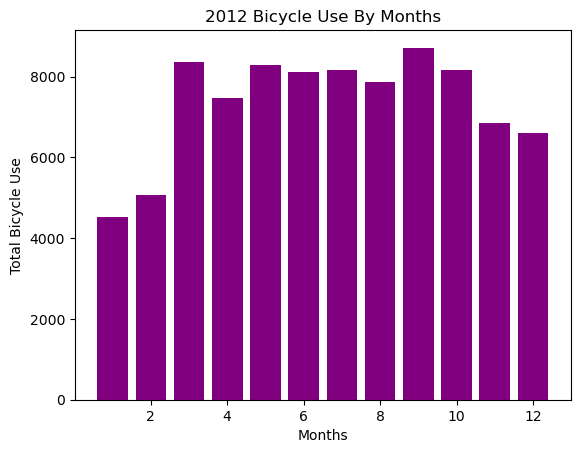

In [14]:
plt.bar(bikedf2012['Month'], bikedf2012['TotalUses'], color = 'Purple')
plt.xlabel("Months")
plt.ylabel('Total Bicycle Use')
plt.title('2012 Bicycle Use By Months')

In [15]:
# Next few cells will take a look at the increase in use between 2011 and 2012

#Gathers and sums up values within the TotalUses columns in both yearly dataframe variables
totalyearlyuse = bikedf2011['TotalUses'].sum() + bikedf2012['TotalUses'].sum()

In [16]:
# Makes % out of 2012 TotalUses
uses12 = bikedf2012['TotalUses'].sum() / totalyearlyuse
uses12

0.6224645645688511

In [17]:
# Makes % out of 2011 TotalUses
uses11 = bikedf2011['TotalUses'].sum() / totalyearlyuse
uses11

0.3775354354311489

In [18]:
# Simply calculates the difference between the %s calculated
uses12 - uses11

#Almost 25% difference in total service usage

0.2449291291377022

Text(0.5, 1.0, 'Yearly Services By Temperature')

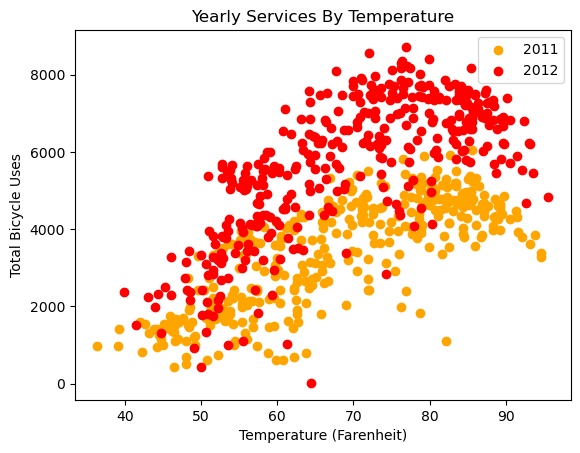

In [19]:
plt.scatter(bikedf2011['Temp'], bikedf2011['TotalUses'], color = 'Orange', label='2011')
plt.scatter(bikedf2012['Temp'], bikedf2012['TotalUses'], color = 'Red', label='2012')
plt.xlabel('Temperature (Farenheit)')
plt.legend()
plt.ylabel('Total Bicycle Uses')
plt.title('Yearly Services By Temperature')

# Scatter Plot Shows a strong positive correlation bewteen Temperature and Total Uses

### Part 5: Missing Data

N/A: None of the rows/columns in our dataset had missing data, so it was not necessary to drop any data.

### Part 6: Feature Creation

In [20]:
# Creation of the R_UsageRate column to show the proposrtion of registered users

oribikedf['R_Rate'] = oribikedf['Reg_Users'] / oribikedf['TotalUses']
pd.options.display.float_format = '{:.1f}'.format
oribikedf

,Date,Season,Year,Month,Holiday,Weekday,Workday,WtrStatus,Temp,FeltTemp,Humidity,WindSpd,Cas_Users,Reg_Users,TotalUses,R_Rate
0,1/1/2011,1,0,1,0,6,0,2,57.4,64.7,80.6,10.7,331,654,985,0.7
1,1/2/2011,1,0,1,0,0,0,2,58.8,63.8,69.6,16.7,131,670,801,0.8
2,1/3/2011,1,0,1,0,1,1,1,46.5,49.0,43.7,16.6,120,1229,1349,0.9
3,1/4/2011,1,0,1,0,2,1,1,46.8,51.1,59.0,10.7,108,1454,1562,0.9
4,1/5/2011,1,0,1,0,3,1,1,48.7,52.6,43.7,12.5,82,1518,1600,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,12/27/2012,1,1,12,0,4,1,2,50.8,52.4,65.3,23.5,247,1867,2114,0.9
727,12/28/2012,1,1,12,0,5,1,2,50.7,55.0,59.0,10.4,644,2451,3095,0.8
728,12/29/2012,1,1,12,0,6,0,2,50.7,53.8,75.3,8.3,159,1182,1341,0.9
729,12/30/2012,1,1,12,0,0,0,1,50.9,52.9,48.3,23.5,364,1432,1796,0.8


### Section 7: Encoding Non-Numeric Features

In [21]:
# Creation of encoded dummmy variables for Season, since it is not binary
cat_encoder_season = cat_encoder.fit_transform(oribikedf[['Season']].values)
cat_season = pd.DataFrame(cat_encoder_season.toarray(), columns=['Spring', 'Summer', 'Autumn', 'Winter'])
oribikedf = oribikedf.join(cat_season, rsuffix='_season_encoded')
oribikedf = oribikedf.drop('Season', axis=1)

# Creation of encoded dummmy variables for Month, since it is not binary
cat_encoder_month = cat_encoder.fit_transform(oribikedf[['Month']].values)
cat_month = pd.DataFrame(cat_encoder_month.toarray(), columns=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
oribikedf = oribikedf.join(cat_month, rsuffix='_month_encoded')
oribikedf = oribikedf.drop('Month', axis=1)

# Creation of encoded dummmy variables for WtrStatus, since it is not binary
cat_encoder_wtrstatus = cat_encoder.fit_transform(oribikedf[['WtrStatus']].values)
cat_wtrstatus = pd.DataFrame(cat_encoder_wtrstatus.toarray(), columns=['Clear', 'Cloudy', 'LightRain'])
oribikedf = oribikedf.join(cat_wtrstatus, rsuffix='_wtrstatus_encoded')
oribikedf = oribikedf.drop('WtrStatus', axis=1)

# Creation of encoded dummmy variables for Year, since it is not binary
cat_encoder_year = cat_encoder.fit_transform(oribikedf[['Year']].values)
cat_year = pd.DataFrame(cat_encoder_year.toarray(), columns=['2011', '2012'])
oribikedf = oribikedf.join(cat_year, rsuffix='_year_encoded')
oribikedf = oribikedf.drop('Year', axis=1)

In [22]:
#Dropping Weekday since we will be focusing on workday instead. 

#Displaying the product of the encoding

oribikedf = oribikedf.drop('Weekday', axis=1)
pd.options.display.max_columns = None
oribikedf

,Date,Holiday,Workday,Temp,FeltTemp,Humidity,WindSpd,Cas_Users,Reg_Users,TotalUses,R_Rate,Spring,Summer,Autumn,Winter,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Clear,Cloudy,LightRain,2011,2012
0,1/1/2011,0,0,57.4,64.7,80.6,10.7,331,654,985,0.7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1/2/2011,0,0,58.8,63.8,69.6,16.7,131,670,801,0.8,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1/3/2011,0,1,46.5,49.0,43.7,16.6,120,1229,1349,0.9,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1/4/2011,0,1,46.8,51.1,59.0,10.7,108,1454,1562,0.9,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1/5/2011,0,1,48.7,52.6,43.7,12.5,82,1518,1600,0.9,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,12/27/2012,0,1,50.8,52.4,65.3,23.5,247,1867,2114,0.9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
727,12/28/2012,0,1,50.7,55.0,59.0,10.4,644,2451,3095,0.8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
728,12/29/2012,0,0,50.7,53.8,75.3,8.3,159,1182,1341,0.9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
729,12/30/2012,0,0,50.9,52.9,48.3,23.5,364,1432,1796,0.8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [23]:
# Showing a correlation matrix with these new binary columns
oribikedf.corr(numeric_only=True)

,Holiday,Workday,Temp,FeltTemp,Humidity,WindSpd,Cas_Users,Reg_Users,TotalUses,R_Rate,Spring,Summer,Autumn,Winter,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Clear,Cloudy,LightRain,2011,2012
Holiday,1.0,-0.3,-0.0,-0.0,-0.0,0.0,0.1,-0.1,-0.1,-0.2,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.1,0.0,0.0,-0.1,0.0,-0.1,0.0,0.0,0.1,0.0,0.0,-0.0,-0.0,-0.0,0.0
Workday,-0.3,1.0,0.1,0.1,0.0,-0.0,-0.5,0.3,0.1,0.7,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.1,0.1,0.0,0.0,-0.0
Temp,-0.0,0.1,1.0,1.0,0.1,-0.2,0.5,0.5,0.6,-0.4,-0.6,0.2,0.7,-0.2,-0.4,-0.3,-0.2,-0.0,0.2,0.3,0.4,0.4,0.2,-0.0,-0.2,-0.3,0.1,-0.1,-0.1,-0.0,0.0
FeltTemp,-0.0,0.1,1.0,1.0,0.1,-0.2,0.5,0.5,0.6,-0.4,-0.6,0.2,0.7,-0.2,-0.4,-0.3,-0.2,-0.0,0.2,0.3,0.4,0.3,0.2,-0.0,-0.2,-0.3,0.1,-0.1,-0.1,-0.0,0.0
Humidity,-0.0,0.0,0.1,0.1,1.0,-0.2,-0.1,-0.1,-0.1,0.0,-0.2,-0.0,0.0,0.2,-0.1,-0.1,-0.1,-0.1,0.1,-0.1,-0.1,0.0,0.2,0.1,-0.0,0.1,-0.6,0.5,0.3,0.1,-0.1
WindSpd,0.0,-0.0,-0.2,-0.2,-0.2,1.0,-0.2,-0.2,-0.2,0.1,0.2,0.1,-0.1,-0.1,0.1,0.1,0.1,0.2,-0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.0,-0.1,-0.0,-0.0,0.1,0.0,-0.0
Cas_Users,0.1,-0.5,0.5,0.5,-0.1,-0.2,1.0,0.4,0.7,-0.8,-0.4,0.2,0.3,-0.1,-0.3,-0.2,-0.1,0.1,0.2,0.2,0.2,0.1,0.1,0.1,-0.1,-0.2,0.2,-0.2,-0.2,-0.2,0.2
Reg_Users,-0.1,0.3,0.5,0.5,-0.1,-0.2,0.4,1.0,0.9,0.0,-0.5,0.1,0.3,0.1,-0.3,-0.2,-0.1,-0.0,0.1,0.2,0.1,0.2,0.2,0.1,-0.0,-0.1,0.2,-0.1,-0.2,-0.6,0.6
TotalUses,-0.1,0.1,0.6,0.6,-0.1,-0.2,0.7,0.9,1.0,-0.3,-0.6,0.1,0.3,0.1,-0.4,-0.3,-0.1,-0.0,0.1,0.2,0.2,0.2,0.2,0.1,-0.0,-0.2,0.3,-0.2,-0.2,-0.6,0.6
R_Rate,-0.2,0.7,-0.4,-0.4,0.0,0.1,-0.8,0.0,-0.3,1.0,0.3,-0.2,-0.2,0.1,0.2,0.2,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.0,0.1,0.2,-0.2,0.1,0.1,-0.0,0.0


In [24]:
# Showing a summary statistics matrix with these new binary columns
oribikedf.describe()

,Holiday,Workday,Temp,FeltTemp,Humidity,WindSpd,Cas_Users,Reg_Users,TotalUses,R_Rate,Spring,Summer,Autumn,Winter,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Clear,Cloudy,LightRain,2011,2012
count,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.0
mean,0.0,0.7,68.6,74.7,62.8,12.8,848.2,3656.2,4504.3,0.8,0.2,0.3,0.3,0.2,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.6,0.3,0.0,0.5,0.5
std,0.2,0.5,13.5,14.7,14.2,5.2,686.6,1560.3,1937.2,0.1,0.4,0.4,0.4,0.4,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.5,0.5,0.2,0.5,0.5
min,0.0,0.0,36.4,39.1,0.0,1.5,2.0,20.0,22.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,56.9,62.4,52.0,9.0,315.5,2497.0,3152.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,1.0,68.8,75.8,62.7,12.1,713.0,3662.0,4548.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
75%,0.0,1.0,80.4,86.8,73.0,15.6,1096.0,4776.5,5956.0,0.9,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
max,1.0,1.0,95.6,107.7,97.2,34.0,3410.0,6946.0,8714.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [25]:
# There are currently too many categorical features, so I will drop everything except the Workday, Temp, Hum, WindSpd, TotalUses, Clear, Cloudy, and LightRain columns to streamline the dataset for the Linear Regregression Model
columns_to_drop = ['Date','Holiday','FeltTemp', 'Cas_Users', 'Reg_Users', 'R_Rate', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', '2011', '2012','Spring', 'Summer', 'Autumn', 'Winter']
oribikedf = oribikedf.drop(columns=columns_to_drop)
pd.options.display.float_format = '{:.4f}'.format

oribikedf

,Workday,Temp,Humidity,WindSpd,TotalUses,Clear,Cloudy,LightRain
0,0,57.3995,80.5833,10.7499,985,0.0000,1.0000,0.0000
1,0,58.8247,69.6087,16.6521,801,0.0000,1.0000,0.0000
2,1,46.4917,43.7273,16.6367,1349,1.0000,0.0000,0.0000
3,1,46.7600,59.0435,10.7398,1562,1.0000,0.0000,0.0000
4,1,48.7494,43.6957,12.5223,1600,1.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...
726,1,50.7575,65.2917,23.4589,2114,0.0000,1.0000,0.0000
727,1,50.6960,59.0000,10.4166,3095,0.0000,1.0000,0.0000
728,0,50.6960,75.2917,8.3337,1341,0.0000,1.0000,0.0000
729,0,50.8805,48.3333,23.5005,1796,1.0000,0.0000,0.0000


In [26]:
#dropping one of the binary columns to be used as a baseline in the regression analysis
oribikedf = oribikedf.drop('Clear', axis=1)
oribikedf

,Workday,Temp,Humidity,WindSpd,TotalUses,Cloudy,LightRain
0,0,57.3995,80.5833,10.7499,985,1.0000,0.0000
1,0,58.8247,69.6087,16.6521,801,1.0000,0.0000
2,1,46.4917,43.7273,16.6367,1349,0.0000,0.0000
3,1,46.7600,59.0435,10.7398,1562,0.0000,0.0000
4,1,48.7494,43.6957,12.5223,1600,0.0000,0.0000
...,...,...,...,...,...,...,...
726,1,50.7575,65.2917,23.4589,2114,1.0000,0.0000
727,1,50.6960,59.0000,10.4166,3095,1.0000,0.0000
728,0,50.6960,75.2917,8.3337,1341,1.0000,0.0000
729,0,50.8805,48.3333,23.5005,1796,0.0000,0.0000


### Section 8: Train and Test Set Creation

In [27]:
# Creates the training dataset and the testing dataset. Shows the training set

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(oribikedf, test_size=0.3, random_state=42)
train_set

,Workday,Temp,Humidity,WindSpd,TotalUses,Cloudy,LightRain
223,1,84.2750,41.5000,8.4166,4905,0.0000,0.0000
684,1,55.7390,62.0417,10.2501,5445,1.0000,0.0000
685,1,57.4610,52.4583,11.4587,5698,0.0000,0.0000
163,1,78.8630,49.4583,20.4584,5020,0.0000,0.0000
394,1,51.8645,40.0833,14.4581,3624,0.0000,0.0000
...,...,...,...,...,...,...,...
71,0,60.3649,52.7391,18.1305,2417,0.0000,0.0000
106,0,65.7020,47.9583,20.3342,3744,0.0000,0.0000
270,1,78.8630,84.8750,9.9581,3907,1.0000,0.0000
435,0,58.6963,47.6957,14.9133,4911,0.0000,0.0000


In [28]:
# Shows the testing set
test_set

,Workday,Temp,Humidity,WindSpd,TotalUses,Cloudy,LightRain
703,1,67.1165,73.3750,11.6666,6606,0.0000,0.0000
33,1,45.7974,43.7826,18.6094,1550,0.0000,0.0000
300,1,56.4155,58.5833,15.3751,3747,1.0000,0.0000
456,0,63.4265,67.6250,11.5419,6041,1.0000,0.0000
633,1,72.5900,57.0000,15.8335,7538,0.0000,0.0000
...,...,...,...,...,...,...,...
299,1,66.6860,81.2917,13.2501,2659,1.0000,0.0000
516,1,82.1840,49.2917,13.0837,7338,0.0000,0.0000
533,0,75.7265,59.8750,9.7086,6978,0.0000,0.0000
264,1,78.3710,90.2083,8.5844,4795,1.0000,0.0000


In [29]:
# Preparing the Data for the Linear Regression Algorithm by creating the X and Y datasets so that X can be used to predict
oribikedf_train_X = train_set.drop("TotalUses", axis=1) 
oribikedf_train_y = train_set["TotalUses"].copy()

# Conduction the same procedure for the test set
oribikedf_test_X = test_set.drop("TotalUses", axis=1) 
oribikedf_test_y = test_set["TotalUses"].copy()

### Section 9: Training the Model

In [30]:
# Importing the model, giving it a name, and giving it the training datasets
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(oribikedf_train_X, oribikedf_train_y)

pd.options.display.max_rows = None
pd.options.display.float_format = '{:.4f}'.format
pd.DataFrame(lin_reg.coef_, index = oribikedf_train_X.columns)

,0
Workday,83.3232
Temp,85.9207
Humidity,-17.3902
WindSpd,-55.6456
Cloudy,-264.1717
LightRain,-1692.2684


### Section 10: Model Evalutation

In [31]:
# Using In-sample/Train Set evaluation to see how much error the model has  (Mean Squared Error)
from sklearn.metrics import mean_squared_error
oribikedf_predictions_train = lin_reg.predict(oribikedf_train_X)
actual_TotalUses = pd.DataFrame(oribikedf_train_y).reset_index(drop=True)
pd.DataFrame(oribikedf_predictions_train).round().join(actual_TotalUses).rename(columns={0:'Predicted'})

,Predicted,TotalUses
0,6657.0000,4905
1,3482.0000,5445
2,3993.0000,5698
3,5384.0000,5020
4,3561.0000,3624
5,5632.0000,7572
6,5064.0000,6883
7,3646.0000,4075
8,4190.0000,4521
9,3604.0000,3727


In [32]:
# This error does not seem to be very good
lin_mse = mean_squared_error(oribikedf_train_y, oribikedf_predictions_train)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1385.8444349525835

In [33]:
from sklearn.metrics import mean_absolute_error
lin_mae = mean_absolute_error(oribikedf_train_y, oribikedf_predictions_train)
lin_mae

1133.9624639844887

In [34]:
# Using Out-of-sample/Test Set evaluation to see how much error the model has (Mean Squared Error)
oribikedf_predictions_test = lin_reg.predict(oribikedf_test_X)
actual_TotalUses = pd.DataFrame(oribikedf_test_y).reset_index(drop=True)
pd.DataFrame(oribikedf_predictions_test).round().join(actual_TotalUses).rename(columns={0:'Predicted'})

,Predicted,TotalUses
0,4448.0000,6606
1,2744.0000,1550
2,3315.0000,3747
3,3890.0000,6041
4,4971.0000,7538
5,6233.0000,7264
6,2382.0000,1605
7,3507.0000,2209
8,6585.0000,7499
9,5645.0000,5743


In [35]:
# This error does not seem to be very good either
lin_mse = mean_squared_error(oribikedf_test_y, oribikedf_predictions_test)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1416.3480800432335

In [36]:
# Taking a look at mean_absolute_error
lin_mae = mean_absolute_error(oribikedf_test_y, oribikedf_predictions_test)
lin_mae

1186.44755339261

### Section 11: Example Prediction for the Day we Return to School, 01/08/2024

In [37]:
#Let's say that we are trying to predict the numbers of users on Jan 8 2024, and the weather/variables are expected to be this:
exampledata = {
    'Workday': [1],
    'Temp': [55],
    'Humidity': [60],
    'WindSpd': [12],
    'Cloudy': [0.0000],
    'LightRain': [1.0000]
}

exdf = pd.DataFrame(exampledata)
exdf

,Workday,Temp,Humidity,WindSpd,Cloudy,LightRain
0,1,55,60,12,0.0000,1.0000


In [38]:
# The predicition would be about 1928 users
new_predictions_train = lin_reg.predict(exdf)
new_predictions_train

array([1928.38661572])